<a href="https://colab.research.google.com/github/RickyBandi/GEN-AI/blob/main/LAB_10_(Simple_Code).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SAMPLE QUESTION**


Set A: Building and Training CNN Models
1.	Build and train a CNN model using the CIFAR-10 dataset. Use the following architecture:


*   Convolution Layer 1: 32 filters, kernel size (3,3), ReLU activation
*   Max Pooling Layer 1: Pool size (2,2)
*   Convolution Layer 2: 64 filters, kernel size (3,3), ReLU activation
*   Max Pooling Layer 2: Pool size (2,2)
*   Dense Layer: 256 units, ReLU activation
*   Output Layer: 10 units, softmax activation


Compile, train, and evaluate the model using the Adam optimizer. Report the test accuracy.


Experiment with different batch sizes (16, 32, and 64) on this dataset. Compare the training time and testing accuracy for each batch size.


---



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import time

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 31s 0us/step


In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# Build the CNN model
def build_model():
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dense(10, activation='softmax')  # Output layer for classification
    ])
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [ ]:
batch_sizes = [16, 32, 64]
results = {}

In [ ]:
for batch_size in batch_sizes:
    print(f"\nTraining with batch size: {batch_size}")
    model = build_model()


    start_time = time.time()
    history = model.fit(
        x_train, y_train,
        validation_data=(x_test, y_test),
        epochs=5,
        batch_size=batch_size,
        verbose=1
    )
    end_time = time.time()


    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    results[batch_size] = {
        'accuracy': test_accuracy * 100,
        'training_time': end_time - start_time
    }

    print(f"Batch Size {batch_size}: Testing Accuracy = {test_accuracy * 100:.2f}%, Training Time = {end_time - start_time:.2f} seconds")


print("\nSummary of Results:")
for batch_size, result in results.items():
    print(f"Batch Size {batch_size}: Accuracy = {result['accuracy']:.2f}%, Training Time = {result['training_time']:.2f} seconds")


Training with batch size: 16
Epoch 1/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 100s 31ms/step - accuracy: 0.4055 - loss: 1.6286 - val_accuracy: 0.6069 - val_loss: 1.1210
Epoch 2/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 141s 31ms/step - accuracy: 0.6346 - loss: 1.0381 - val_accuracy: 0.6584 - val_loss: 0.9605
Epoch 3/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 143s 32ms/step - accuracy: 0.7027 - loss: 0.8491 - val_accuracy: 0.6791 - val_loss: 0.9403
Epoch 4/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 146s 33ms/step - accuracy: 0.7485 - loss: 0.7242 - val_accuracy: 0.6908 - val_loss: 0.9129
Epoch 5/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 138s 32ms/step - accuracy: 0.7896 - loss: 0.5978 - val_accuracy: 0.6929 - val_loss: 0.9513
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6902 - loss: 0.9424
Batch Size 16: Testing Accuracy = 69.29%, Training Time = 671.17 seconds

Training with batch size: 32
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 51ms/step - accuracy: 0.4170 - loss: 1.5980 - val_accuracy: 0.5878 - val_loss: 1.1591


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

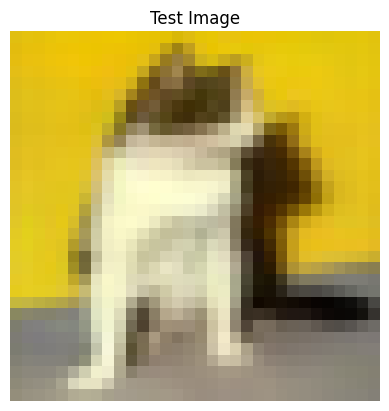

In [ ]:
random_index = np.random.randint(0, x_test.shape[0])
test_image = x_test[random_index]

test_image_reshaped = test_image.reshape(1, 32, 32, 3)

plt.imshow(test_image)
plt.title("Test Image")
plt.axis('off')
plt.show()

In [ ]:
predicted_class = np.argmax(model.predict(test_image_reshaped))

class_labels = [
    'Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
    'Dog', 'Frog', 'Horse', 'Ship', 'Truck'
]

print(f"Predicted Class: {class_labels[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
Predicted Class: Dog
